In [116]:
data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
     ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
     ("data science", 60, 70), ("analytics", 90, 3),
     ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
     ("actionable insights", 40, 30), ("think out of the box", 45, 10),
     ("self-starter", 30, 50), ("customer focus", 65, 15),
     ("thought leadership", 35, 35)]

documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

In [117]:
def text_size(total):
    """Equals 8 if total is 0, 18 if total is 200."""
    return 8 + total / 200 + 10

([], <a list of 0 Text yticklabel objects>)

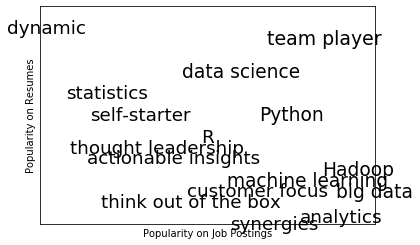

In [118]:
%matplotlib inline

import matplotlib.pyplot as plt

for word, job_popularity, resume_popularity in data:
    plt.text(job_popularity, resume_popularity, word, 
             ha='center', va='center',
             size=text_size(job_popularity + resume_popularity))

plt.xlabel('Popularity on Job Postings')
plt.ylabel('Popularity on Resumes')
plt.axis([0, 100, 0, 100])
plt.xticks([])
plt.yticks([])

In [119]:
def fix_unicode(text):
    return text.replace(u"\u2019", "'")

In [120]:
from bs4 import BeautifulSoup
import requests

In [121]:
url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
html = requests.get(url).text
soup = BeautifulSoup(html, 'html.parser')

In [122]:
content = soup.find('body')
content

<body class="body t-data" data-section="ideas">
<div class="flashes"></div>
<header id="page-header">
<div class="t-bkg" id="header-bar">
<h1 class="logo t-bkg">
<a class=" logo-white " href="/">
<svg aria-label="O'Reilly" role="heading">
<title>O'Reilly</title>
<use xlink:href="/assets/icons-8812ab3f83.svg#oreilly-logo"></use>
</svg>
</a>
</h1>
<nav>
<a href="/ideas">Ideas</a>
<a href="https://learning.oreilly.com">Learning Platform</a>
<a href="http://www.oreilly.com/conferences/">Conferences</a>
<a href="http://shop.oreilly.com/">Shop</a>
</nav>
<div class="right">
<div class="hide" id="search">
<form action="https://ssearch.oreilly.com" class="search-form expanded" method="GET" target="_blank">
<label class="hide" for="text">Search </label> <input class="transparent" name="q" placeholder="Search..." type="text"/>
<a class="search-cta"><span class="icon icon-search ">
<svg role="img">
<title>search</title>
<use xlink:href="/assets/icons-8812ab3f83.svg#search"></use>
</svg>
</span></

In [123]:
regex = r"[\w']+|[\.]"

In [124]:
import re
document = []

for paragraph in content.find_all('p'):
    word = re.findall(regex, fix_unicode(paragraph.text))
    document.extend(word)

In [125]:
len(document)

5166

In [126]:
document[:5]

['The', 'future', 'belongs', 'to', 'the']

In [127]:
from collections import defaultdict
import random

bigrams = zip(document, document[1:])
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)
transitions['.'][:10]

["We've", 'Five', '0', 'But', 'The', 'Almost', "There's", 'But', 'A', "It's"]

In [128]:
def generate_using_bigrams():
    current = '.' # This means that the next word will start a sentence.
    result = []
    
    while True:
        next_word_candidates = transitions[current]
        current = random.choice(next_word_candidates)
        result.append(current)
        if current == '.': return " ".join(result)

In [129]:
generate_using_bigrams()

'Whether humans or has an excellent graphics package library CRAN is difficult problem with faster than kept pace with badly behaved data scientist at bit .'

In [130]:
trigrams = zip(document, document[1:], document[2:])
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in trigrams:
    if prev == '.':
        starts.append(current)
    trigram_transitions[(prev, current)].append(next)

In [131]:
def generate_using_trigrams():
    current = random.choice(starts)
    prev = '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next_word = random.choice(next_word_candidates)
        
        prev, current = current, next_word
        result.append(current)
        
        if current == '.':
            return ' '.join(result)

In [132]:
generate_using_trigrams()

"Data science requires skills ranging from traditional business intelligence BI to understanding how Google's ad auctions work ."

In [133]:
grammar = {
        "_S"  : ["_NP _VP"],
        "_NP" : ["_N",
                 "_A _NP _P _A _N"],
        "_VP" : ["_V",
                 "_V _NP"],
        "_N"  : ["data science", "Python", "regression"],
        "_A"  : ["big", "linear", "logistic"],
        "_P"  : ["about", "near"],
        "_V"  : ["learns", "trains", "tests", "is"]
}

In [134]:
def is_terminal(token):
    return token[0] != '_'

In [135]:
def expand(grammar, tokens):
    for i, token in enumerate(tokens):
        # Skip over terminals.
        if is_terminal(token): continue
        
        # If we get here, we found a non-terminal token
        # so we need to choose a replacement at random.
        replacement = random.choice(grammar[token])
        
        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
            
        # Now call expand on the new list of tokens.
        return expand(grammar, tokens)
    # If we get here we had all terminals and are done.
    return tokens

In [136]:
def generate_sentence(grammar):
    return expand(grammar, ['_S'])

In [137]:
generate_sentence(grammar)

['linear',
 'logistic',
 'regression',
 'near',
 'linear',
 'Python',
 'about',
 'linear',
 'regression',
 'is',
 'data science']

In [138]:
# Gibs Sampling.
def roll_a_die():
    return random.choice([1,2,3,4,5,6])

In [139]:
def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

In [140]:
def random_y_given_x(x):
    """Equality likely to be x + 1, x + 2, ... x + 6"""
    return x + roll_a_die()

In [141]:
def random_x_given_y(y):
    if y <= 7:
        # If the total is 7 or less, the first die is equally likely to be
        # 1, 2, ... (total - 1).
        return random.randrange(1, y)
    else:
        # If the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6.
        return random.randrange(y - 6, 7)

In [142]:
def gibbs_sample(num_iters=1000):
    x, y = 1, 2 # Doesn't really matter.
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

In [143]:
def compare_distribution(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[gibbs_sample()][1] += 1
    return counts

In [144]:
def sample_from(weights):
    """Returns i with probability weights[i] / sum(weights)."""
    total = sum(weights)
    rnd = total * random.random() # Uniform between 0 and total.
    for i, w in enumerate(weights):
        rnd -= w # Return the smallest i such that.
        if rnd <= 0: return i # weights[0] + ... + weights[i] >= rnd.

In [145]:
from collections import Counter

# A list of Counters, one for each document.
document_topic_counts = [Counter() for _ in documents]

In [146]:
K = 4 # Number of topics.

# A list of Counters, one for each topic.
topic_word_counts = [Counter() for _ in range(K)]

In [147]:
# A list of numbers, one for each topic.
topic_counts = [0 for _ in range(K)]

In [156]:
# A list of numbers, one for each document.
document_lengths = list(map(len, documents))

In [157]:
# The number of distinct words.
distinct_words = set(word for document in documents for word in document)
W = len(distinct_words)

In [164]:
D = len(documents)
D

15

In [159]:
def p_topic_given_document(topic, d, alpha=0.1):
    """The fraction of words in document _d_ that are 
    assigned to _topic_ (plus some smoothing)."""
    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

In [170]:
def p_word_given_topic(word, topic, beta=0.1):
    """The fraction of words assigned to _topic_ that 
    equal _word_ (plus some smoothing)."""
    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

In [171]:
def topic_weight(d, word, k):
    """Given a document and a word in that document, 
    return the weight for the kth topic."""
    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

In [172]:
def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k) 
                        for k in range(K)])

In [173]:
random.seed(0)

document_topics = [[random.randrange(K) for word in document]
                   for document in documents]
len(document_topics)

15

In [174]:
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

for iter in range(1_000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):
            # Remove this word/topic from the counts
            # so that it doesn't influence the weights.
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1
            
            # Choose a new topic based on the weights.
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic
            
            # And now add it back to the counts.
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print(k, word, count)

0 HBase 4
0 scikit-learn 4
0 pandas 4
0 Big Data 3
0 R 2
0 Java 2
0 C++ 2
0 Haskell 2
0 artificial intelligence 2
0 statsmodels 2
0 regression 1
0 statistics 1
0 Hadoop 1
0 libsvm 1
0 programming languages 1
0 scipy 1
0 numpy 1
0 mathematics 1
0 deep learning 1
1 neural networks 4
1 deep learning 3
1 MongoDB 3
1 HBase 2
1 decision trees 2
1 theory 2
1 Mahout 2
1 databases 2
1 Postgres 2
1 MySQL 2
1 Cassandra 1
1 Python 1
1 numpy 1
1 statistics 1
2 Java 6
2 Cassandra 5
2 Python 5
2 regression 5
2 R 5
2 probability 3
2 machine learning 3
2 statistics 3
2 Postgres 2
2 statsmodels 2
2 C++ 2
2 artificial intelligence 2
2 HBase 2
2 MongoDB 1
2 scipy 1
2 mathematics 1
3 Big Data 5
3 Hadoop 4
3 Spark 4
3 Storm 4
3 libsvm 3
3 probability 3
3 NoSQL 2
3 Python 2
3 MapReduce 2
3 support vector machines 2
3 statistics 1
3 machine learning 1
3 programming languages 1
3 R 1


In [180]:
topic_names = ['Big Data and programming language',
               'Python and statistics', 
               'databases',
               'machine learning']

In [181]:
topic_counts

[36, 28, 48, 35]

In [182]:
for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
machine learning 15
databases 8
Big Data and programming language 4
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
databases 5
Python and statistics 3
machine learning 2
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
Big Data and programming language 6
databases 4
Python and statistics 2
['R', 'Python', 'statistics', 'regression', 'probability']
databases 6
Big Data and programming language 3
machine learning 1
['machine learning', 'regression', 'decision trees', 'libsvm']
machine learning 3
databases 3
Python and statistics 2
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
Big Data and programming language 6
machine learning 3
databases 3
['statistics', 'probability', 'mathematics', 'theory']
Python and statistics 3
Big Data and programming language 2
machine learning 2
databases 1
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
Python and statisti